# 4. Matplotlib Plotting of Data
## 4.1 Matplotlib Setup 
The `matplotlib` is a commonly used library to plot data. The package is available from https://matplotlib.org/.

In [4]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\20194060\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\20194060\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


After installing, downloading and initiating matplotlib, it is important to setup the style and layout of the plot that you want to make. This can be achieved in a number of ways, as explained in:
https://matplotlib.org/stable/users/explain/customizing.html

In the below example, the function `rcParams()` is used to define axes and colors. 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

More examples are available on the matplotlib site: (https://matplotlib.org/stable/gallery/index.html).

## 4.3 Making basic plots
Let's reload our earlier used data, using `pandas`, and create plots.

In [14]:
# %matplotlib ipympl
import pandas as pd
df = pd.read_csv(r'files\concrete_data.csv')
rename = {
    'blast_furnace_slag': 'component1',
    'fly_ash': 'component2',
    'superplasticizer': 'component3',
    'coarse_aggregate': 'component4',
    'fine_aggregate ': 'component5',
    'concrete_compressive_strength': 'strength'
}

df = df.rename(columns=rename)
df.rename(columns=rename, inplace=True)
df

,cement,component1,component2,water,component3,component4,component5,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


<Axes: xlabel='age', ylabel='strength'>

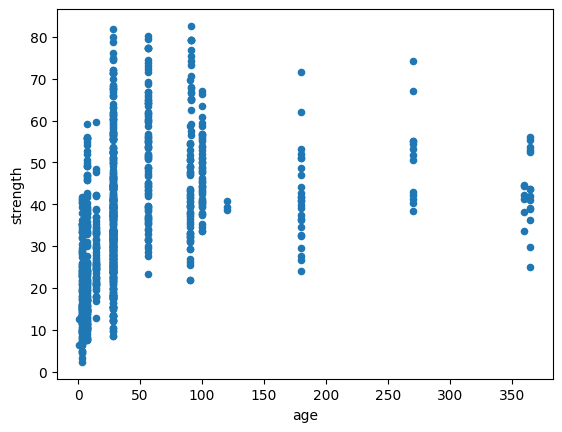

In [15]:
df.plot.scatter(x='age', y='strength')

## 4.4 Advanced plots
Try more advanced features to find out how to make the plot that you need.

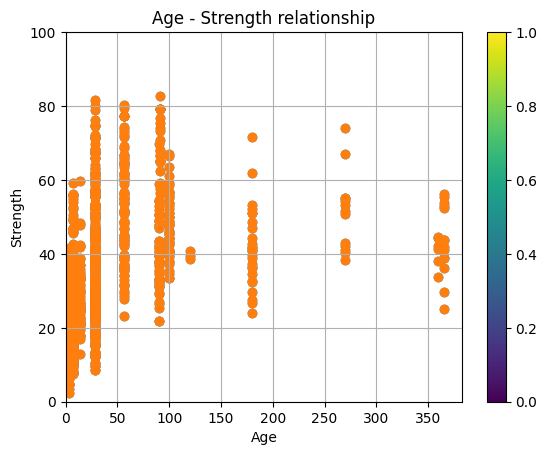

In [20]:
# Creating a figure and an axis object
fig, ax = plt.subplots()
# fig, (ax, ax2) = plt.subplots(1, 2)
# fig, ax = plt.subplots(figsize=(10, 6))

# Plotting data on the axes
x = df.age
y = df.strength

# ax.plot(x, y)
ax.scatter(x, y)
scatter = ax.scatter(x, y, c=None)

# Adding a title to the plot and labels to the axis
ax.set_title('Age - Strength relationship')

ax.set_xlabel('Age')
ax.set_ylabel('Strength')

# Automated titles
# ax.set_title(f'{x.name.capitalize()} - {y.name.capitalize()} relationship')

# ax.set_xlabel(x.name.capitalize())
# ax.set_ylabel(y.name.capitalize())

fig.colorbar(scatter)

# Set bounds
ax.set_ybound(0, 100)
ax.set_xbound(0)

# Displaying grid lines
ax.grid(True)

In [21]:
def plot_scatter(
        x,
        y,
        c=None,
        ax=None,
        figsize=None,
        **kwargs,
    ):
    """
    Plot a scatterplot
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    scatter = ax.scatter(x, y, c=c, **kwargs)

    if c is not None:
        fig.colorbar(scatter)

    # Automated titles
    ax.set_title(f'{x.name.capitalize()} - {y.name.capitalize()} relationship')

    ax.set_xlabel(x.name.capitalize())
    ax.set_ylabel(y.name.capitalize())

    # Set bounds
    ax.set_ybound(0, 100)
    ax.set_xbound(0)

    # Displaying grid lines
    ax.grid(True)

    return ax

What is wrong with this code?

<Axes: title={'center': 'Age - Strength relationship'}, xlabel='Age', ylabel='Strength'>

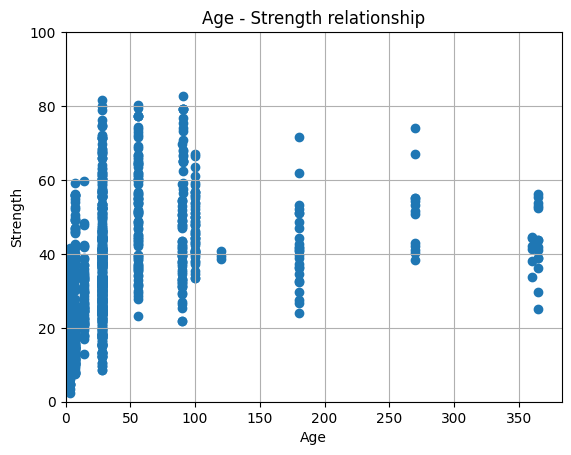

In [22]:
plot_scatter(df.age, df.strength)

## 4.5 Further analysis
Besides the regular plat and the scatter plot, several other plot types are available through `matplotlib`. Depending on your needs, use the plot type that supports you. In the below examples, several other plot types are illustrated.

<Axes: >

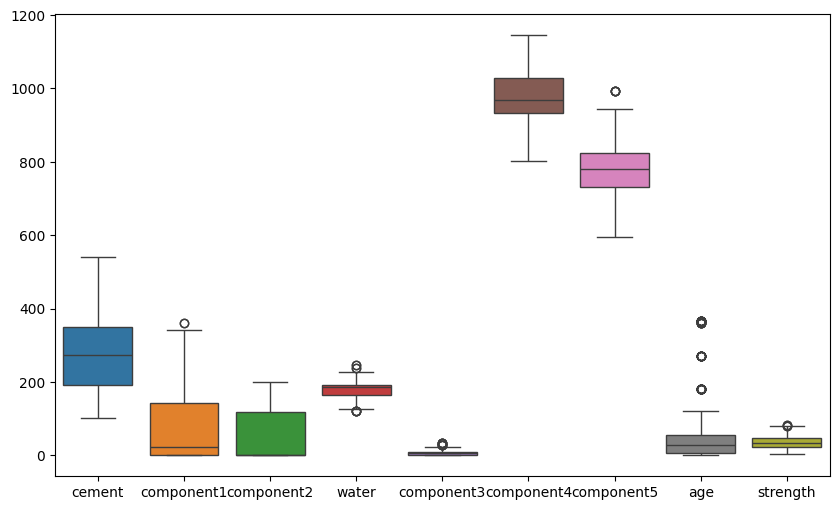

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(df, ax=ax)

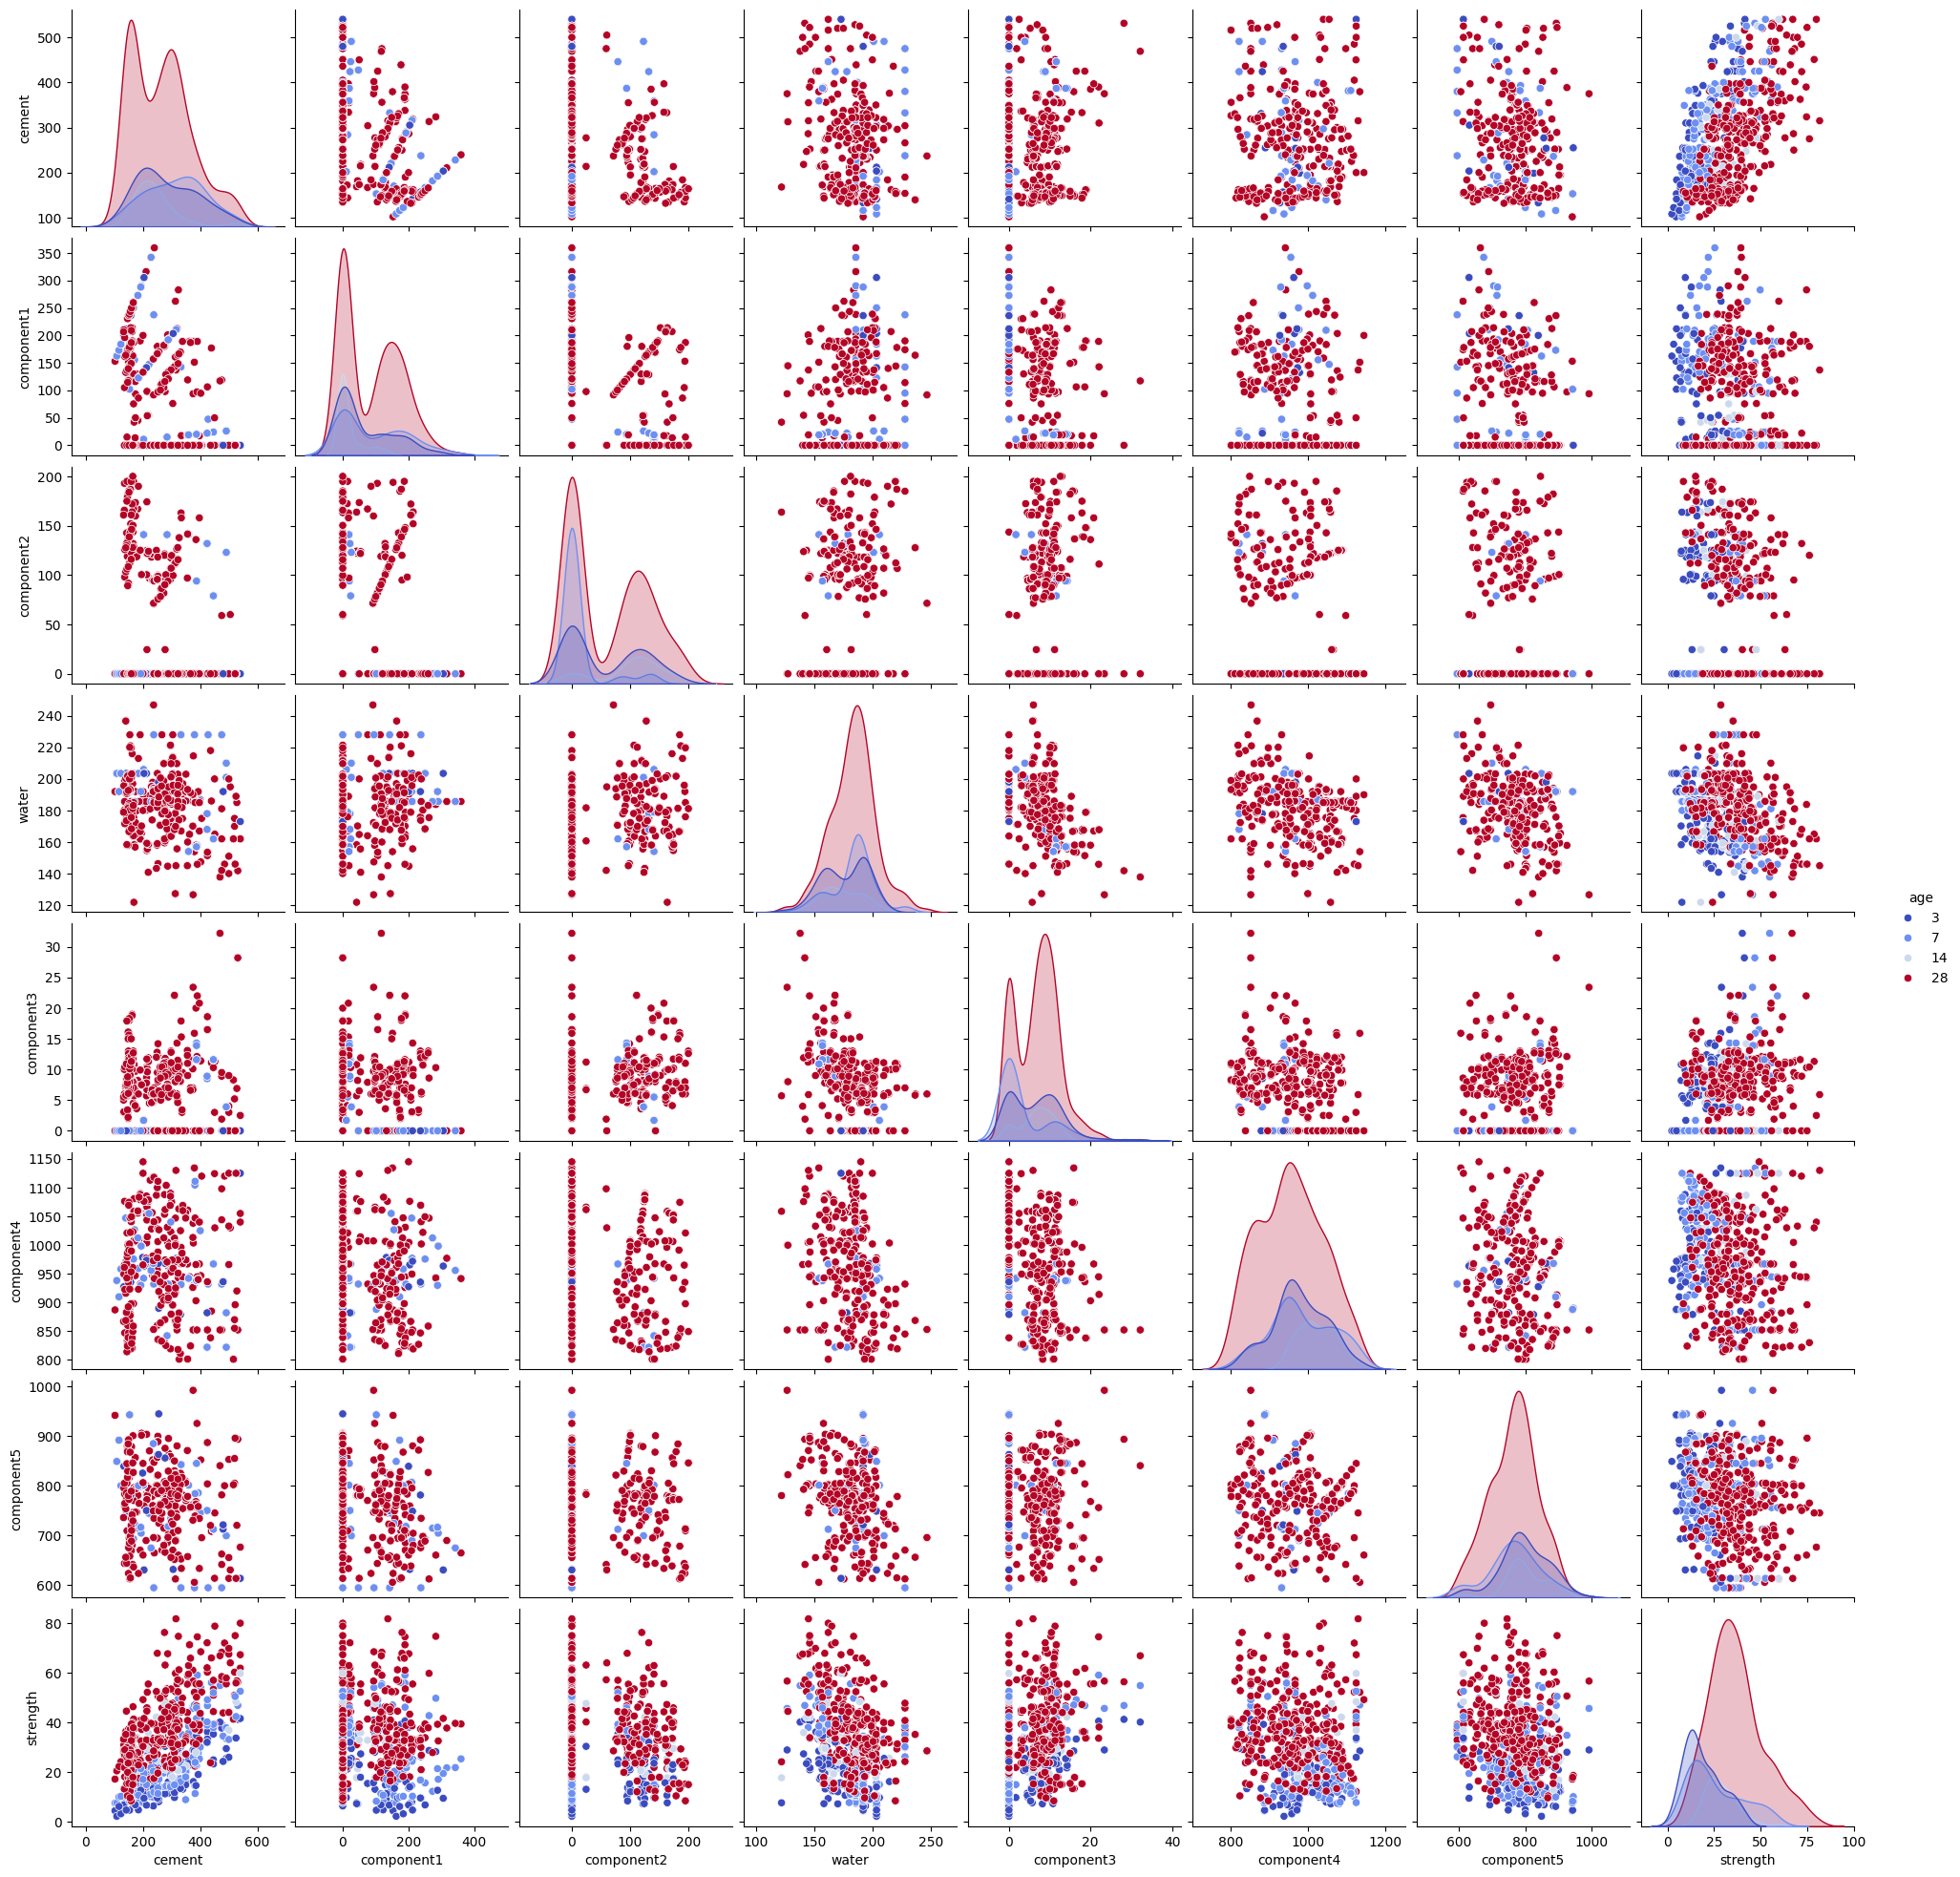

In [25]:
# first we make a subselection in our original dataset
selection = [3, 7, 14, 28]
df_young = df[df['age'].isin(selection)]

# for the young concrete types, we make a `pairplot`
sns.pairplot(df_young, hue='age', palette='coolwarm')

Using the `corr()` function, it is possible to find pairwise correlations of columns for further data analysis.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [26]:
df.corr()
# df.corr().style.background_gradient(cmap='coolwarm')

,cement,component1,component2,water,component3,component4,component5,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
component1,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
component2,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
component3,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
component4,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
component5,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<Axes: >

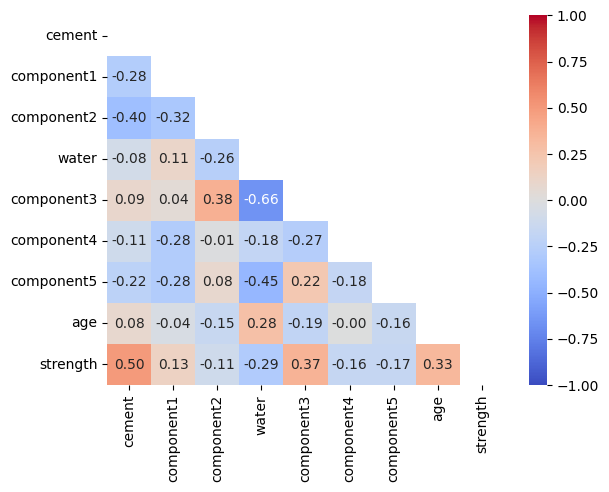

In [28]:
import numpy as np

correlation = df.corr()

mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation, vmin=-1, vmax=1, cmap='coolwarm', annot=True, mask=mask, fmt='.2f')